# Credit Card Fraud Detection_

##### The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud.This model is then used to identify whether a new transaction is fraudulent or not.

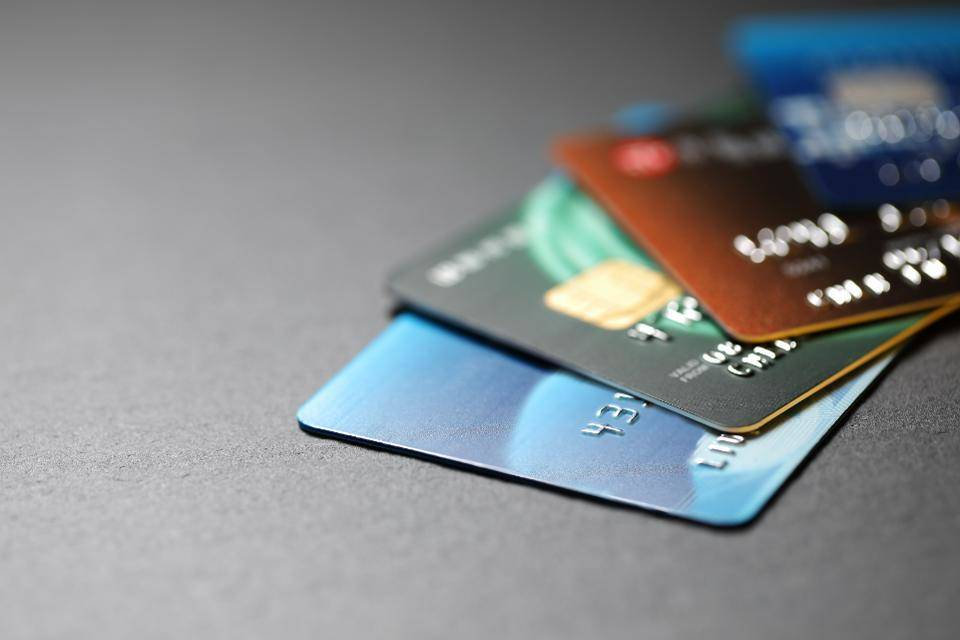

  # <a id='0'>Content</a>
 - <a href='#1'>Introduction</a>  
 - <a href='#2'>Load Packages And Dataset</a>
     -  <a href='#21'>Loading Libraries</a>
     -  <a href='#22'>Loading Dataset</a>
 - <a href='#3'>Univariate and Multivariate Analysis</a>
 - <a href='#4'>Data Processing</a>
 - <a href='#5'>Feature Selection</a>
 - <a href='#6'>Sampling Methods</a>
     -  <a href='#61'>Over Sampling</a>
     -  <a href='#62'>Under Sampling</a>

# <a id="1">Introduction -</a>

- **`ID`** - Client Number
- **`GENDER`** - M:Male , F:Female
- **`CAR`** - Owns car or NO
- **`REALITY`** - Is there a property
- **`NO_OF_CHILD`** - Number Of Children
- **`INCOME`** - Anually Income
- **`EDUCATION_TYPE`** - Educaiton Level
- **`FAMILY_TYPE`** - Marital Status
- **`HOUSE_TYPE`** - Way of Living
- **`FLAG_MOBILE`** - Is there a mobile phone
- **`WORK_PHONE`** - Is there a work phone
- **`PHONE`** - Is there a phone
- **`OCCUPATION_TYPE`** - Occupation
- **`FAMILY_SIZE`** - No. Of family members
- **`BEGIN_MONTH`** - The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on
- **`AGE`** -  Age of the Client
- **`YEARS_EMPLOYED`** -  Years of working
- **`Target`** - Yes : 1, No : 0   // Yes - Fraud, No - Not_fraud

# <a id='2'>Load Packages And Dataset -</a>

- <a id="21">Loading Libraries -</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

- <a href='#22'>Loading Dataset</a>

In [2]:
data=pd.read_csv("../input/credit-card-dataset/credit_dataset.csv",index_col=0)

In [3]:
dataset=data.copy()

In [4]:
# Reviewing the dataset using the head (first 5 rows of dataset) function 
dataset.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [5]:
#shape of dataset
print("Rows    :",dataset.shape[0])
print("Columns :",dataset.shape[1])

Rows    : 25134
Columns : 19


In [6]:
#checking for NULL VALUES in dataset
dataset.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

- There are no missing values in entire dataset

In [7]:
#datatypes of attributes present in dataset
dataset.dtypes

ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE       float64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

- Dataset have few categorical columns those who have datatype as "object"

In [8]:
#checking for unique values in dataset
dataset.nunique()

ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

0    0.98321
1    0.01679
Name: TARGET, dtype: float64


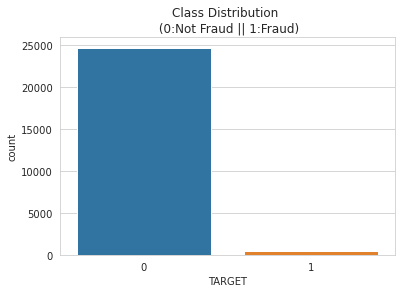

In [9]:
# TARGET column
sns.countplot(dataset.TARGET).set_title("Class Distribution \n (0:Not Fraud || 1:Fraud)")
print(dataset.TARGET.value_counts(normalize=True))
plt.show()

Not Frauds : 98.32 % of the dataset
Frauds : 1.68 % of the dataset


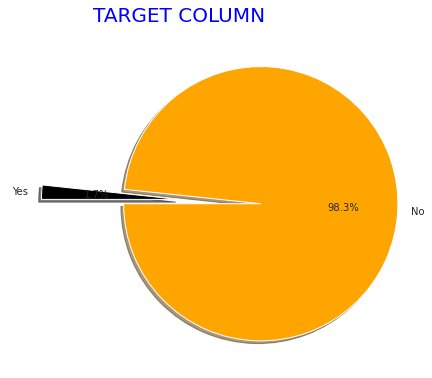

In [10]:
labels = ['No','Yes']
data = dataset['TARGET'].value_counts(sort=True)
colours = ['Orange','black']
explode = (0.6,0)
plt.figure(figsize=(6,6))

plt.pie(data,colors = colours,shadow =True,startangle=180
        ,autopct="%1.1f%%",explode=explode,labels=labels)
plt.title("TARGET COLUMN",fontsize=20,color="b")
plt.tight_layout()

print('Not Frauds :', round(dataset['TARGET'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds :', round(dataset['TARGET'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

- Hence in data there is only 1.68 % are the fraud transcation while 98.32 are valid transcation
- There are 422 Fraud transaction in 25k transaction, the dataset is highly imbalanced

- **Note:** Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [11]:
dataset.describe()

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


- Standard Deviation, Mean and Count of the continuous columns of dataset

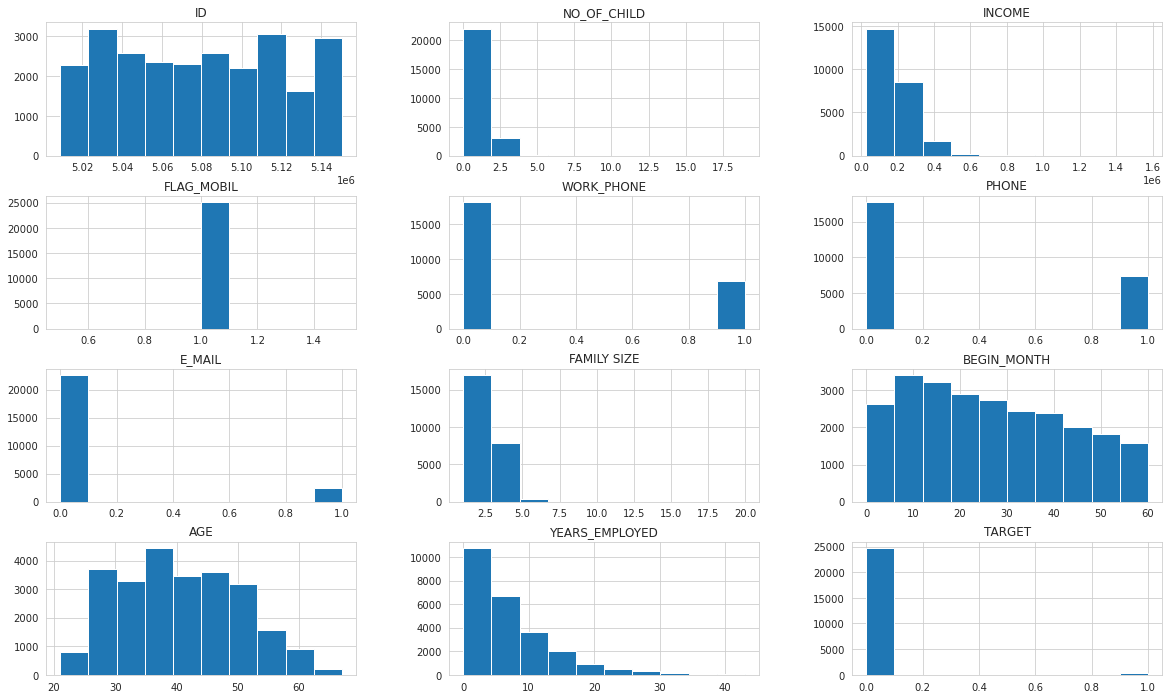

In [12]:
#Distribution of continuous 
dataset.hist(figsize=(20,12))
plt.show()

In [13]:
dataset.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [14]:
#all the categorical columns with their values -
cols=dataset.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(dataset[i].unique())
    print("")

Distinct_values :
 'column_name' = GENDER
['M' 'F']

Distinct_values :
 'column_name' = CAR
['Y' 'N']

Distinct_values :
 'column_name' = REALITY
['Y' 'N']

Distinct_values :
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values :
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values :
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values :
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



- Printing all the  Categorical Values that are persent in dataset

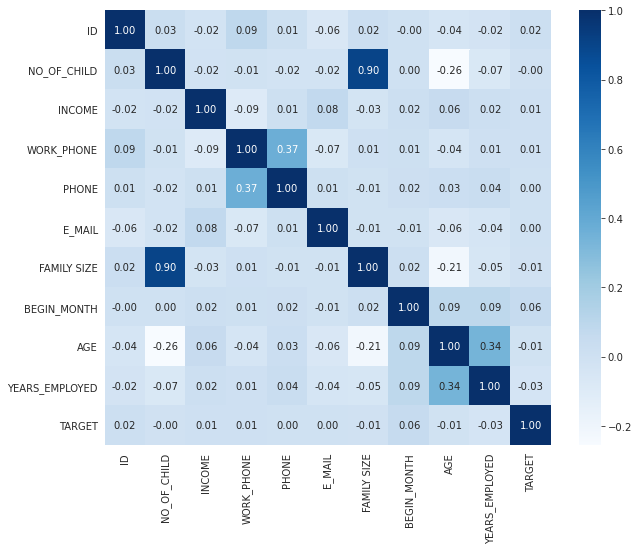

In [15]:
#dropping FLAG_MOBIL as all the values is this column is 1
plt.figure(figsize=(10,8))
sns.heatmap(dataset.drop("FLAG_MOBIL",axis=1).corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

- Correlation Matrix
 - `Note`: All the Categorical values are excluded only the Numerical Values are present in the plot

# <a id='3'>Univariate And Multivariate Analysis

### **`Categorical Columns-`**

##### GENDER

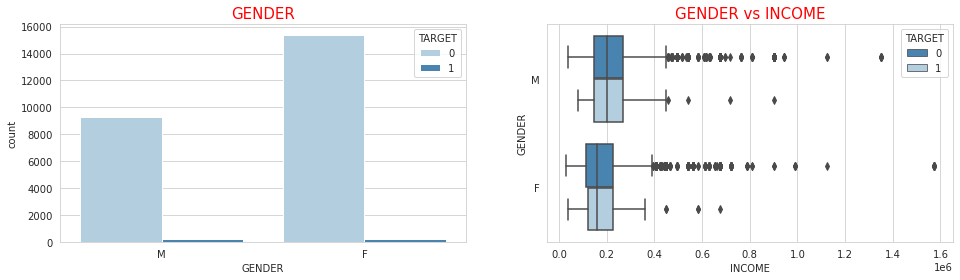

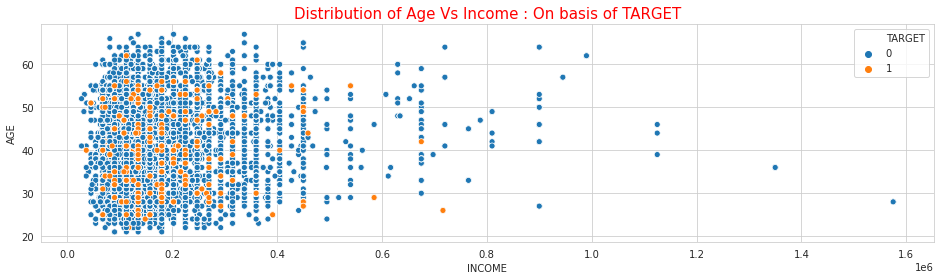

In [16]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(dataset["GENDER"],hue="TARGET",data=dataset,palette="Blues")
plt.title("GENDER",fontsize=15,color="Red")
plt.subplot(122)
sns.boxplot(x="INCOME",y="GENDER",hue="TARGET",data=dataset,palette="Blues_r")
plt.title("GENDER vs INCOME",fontsize=15,color="Red")
plt.figure(figsize=(16,4))
sns.scatterplot(dataset["INCOME"],dataset["AGE"],hue=dataset["TARGET"])
plt.title("Distribution of Age Vs Income : On basis of TARGET",fontsize=15,color="Red")
plt.show()

##### INCOME_TYPE

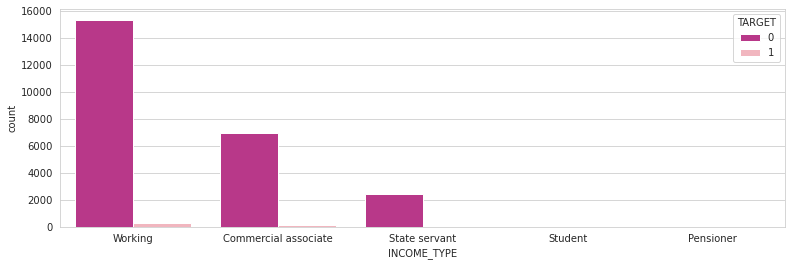

In [17]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["INCOME_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")
plt.show()

##### EDUCATION_TYPE

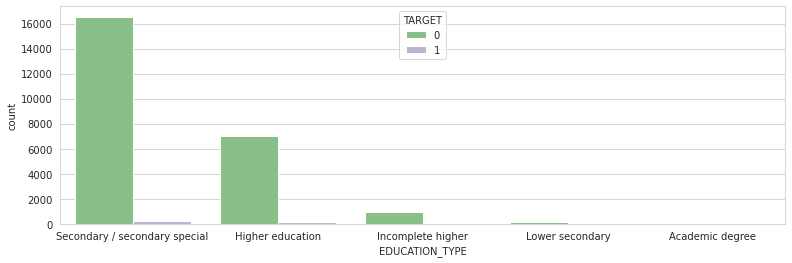

In [18]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["EDUCATION_TYPE"],hue="TARGET",data=dataset,palette="Accent")
plt.show()

- People those who have their `EDUCATION_TYPE` as **Secondary/secondray special** have more Fraudlent count compared to other EDUCATION type

##### FAMILY_TYPE

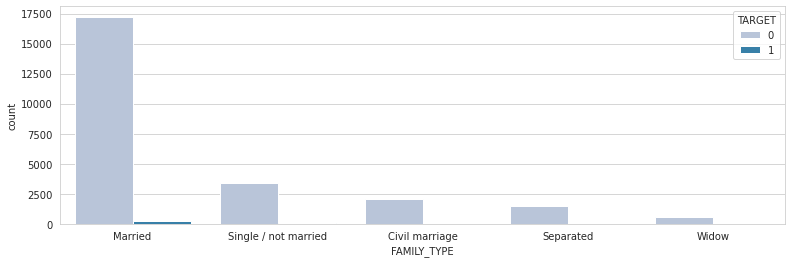

In [19]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["FAMILY_TYPE"],hue="TARGET",data=dataset,palette="PuBu")
plt.show()

- Married people shows more number of fraud cases as compared to other `FAMILY_TYPE`

#####  HOUSE_TYPE

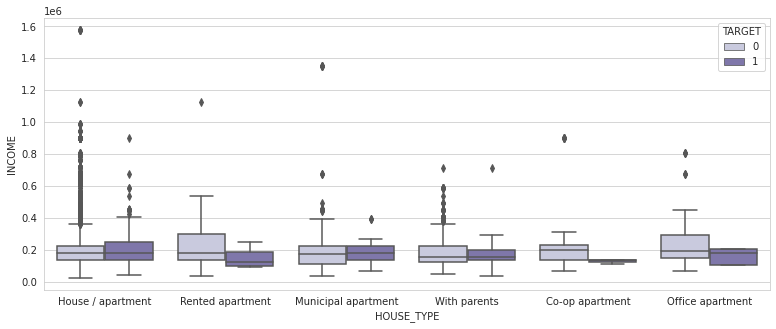

In [20]:
plt.figure(figsize=(13,5))
sns.boxplot(x="HOUSE_TYPE",y="INCOME",data=dataset,hue="TARGET",palette="Purples")
plt.show()

##### YEARS_EMPLOYED

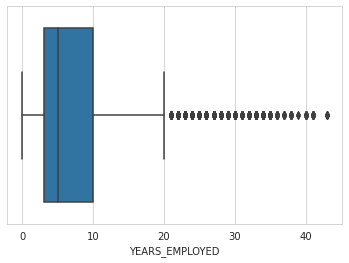

In [21]:
sns.boxplot(dataset["YEARS_EMPLOYED"])
plt.show()

- `YEARS_EMPLOYED` show some outliers which we will deal later

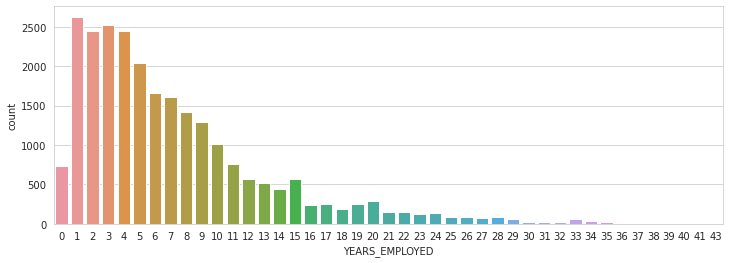

In [22]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"])
plt.show()

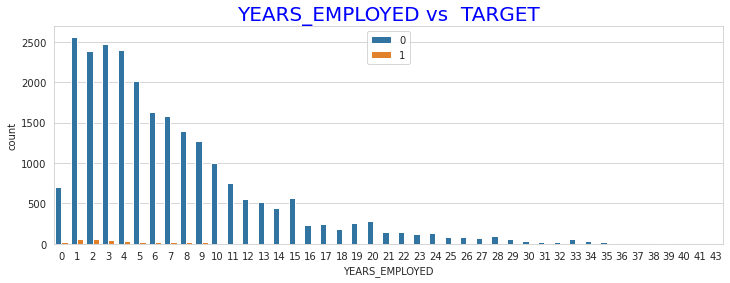

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"],hue="TARGET",data=dataset)
plt.title("YEARS_EMPLOYED vs  TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

- YEARS_EMPLOYED :-
- Most of the employees working experience lies between 1yrs to 15yrs. Countplot is more clustered in this region
- Fraudlent entries also lies in this region

##### BEGIN_MONTH

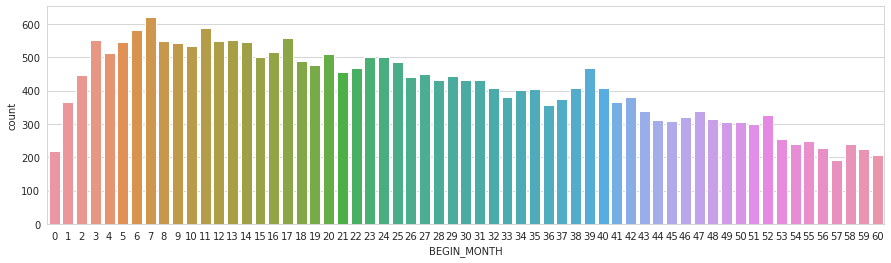

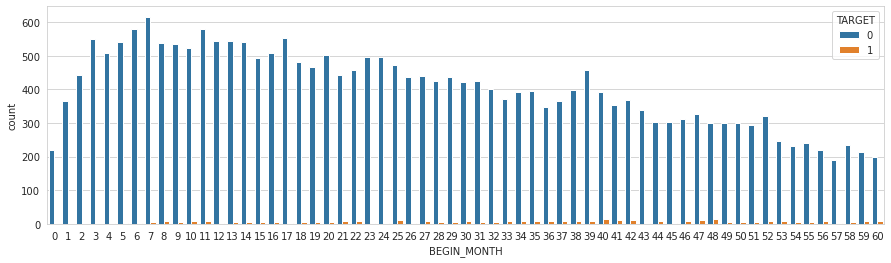

In [24]:
#checking the frequency of BEGIN_MONTH
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"])
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"],hue="TARGET",data=dataset)
plt.show()

##### CAR

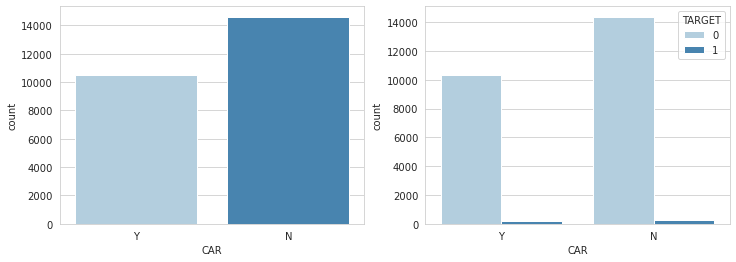

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(dataset["CAR"],palette="Blues")
plt.subplot(122)
sns.countplot(dataset.CAR,hue="TARGET",data=dataset,palette="Blues")
plt.show()

- Majority of people does not have CAR.

#  <a id='4'>Data Processing -</a> 

- ### Detecting Outliers

In [26]:
#these columns have continuous values other are having discrete entries
cont=dataset[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

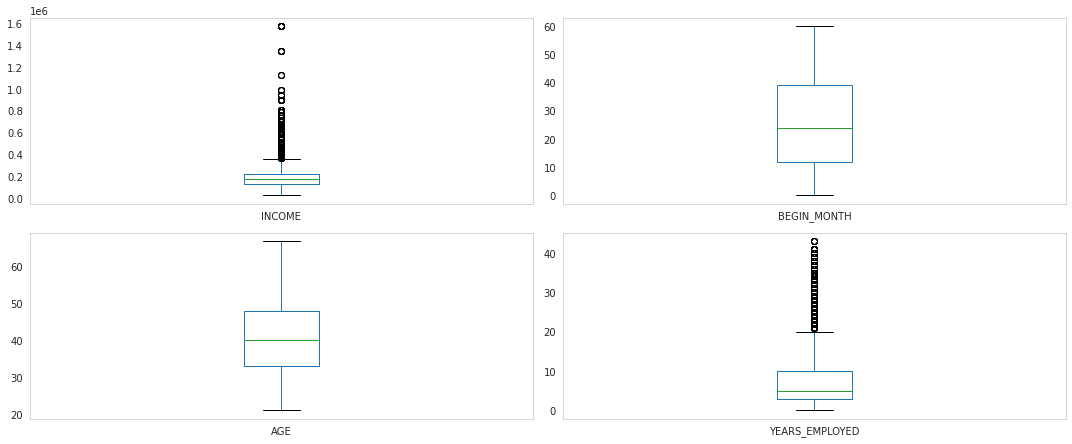

In [27]:
#Using Boxplot to detect the outliers-
plt.figure(figsize=(15,12))

for i ,col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

###### **`BOX-PLOT`**: -
- The box indicates the interquartile range, that is, the top line of the box is the third quartile and the bottom line of the box is the second quartile. 
- The line separating the second and third quartiles indicates the median.
- The lines outside of the box indicate the outer-quartiles (first and fourth).

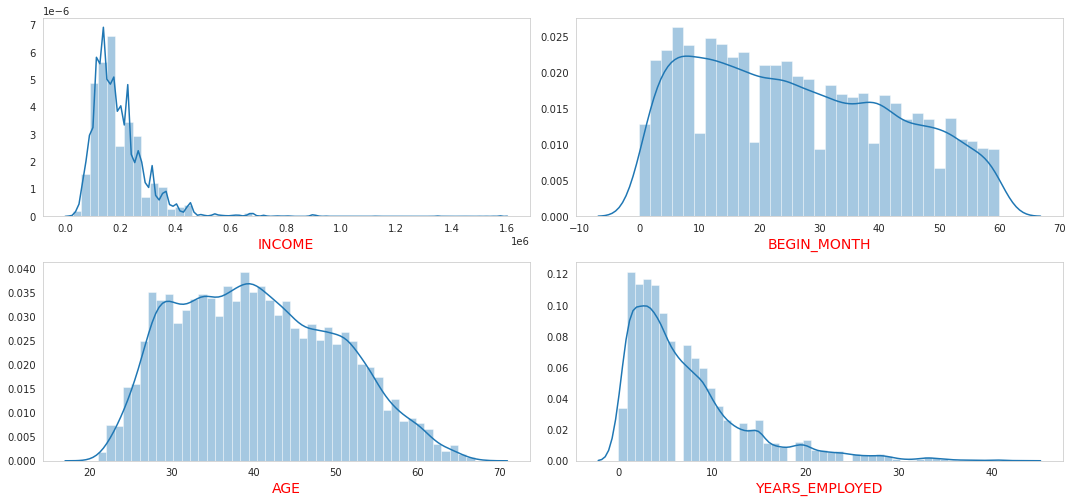

In [28]:
# Distribution of columns those have continuous -
#Histogram
plt.figure(figsize=(15,10))

for i ,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

-  `INCOME` and `YEARS_EMPLOYED` columns does not show normal distribution 
- Graphs of both the columns are right skewed

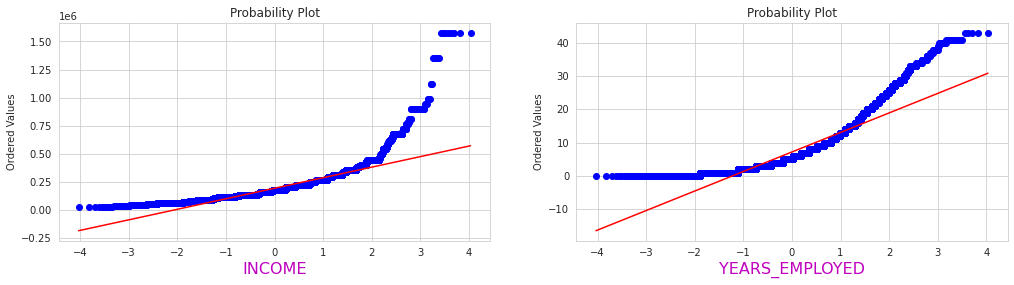

In [29]:
plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")

plt.show()

- `INCOME`    :- Q-Q plot show all the points are not distributed uniformly
- `YEARS_EMPLOYED`  :- As compared to INCOME, YEARS_EMPLOYED shows more disturbance in distribution.It has few outliers because high earning people also there


In [30]:
#removing values those are greater then 600000
dataset=dataset[dataset['INCOME'] < 600000]

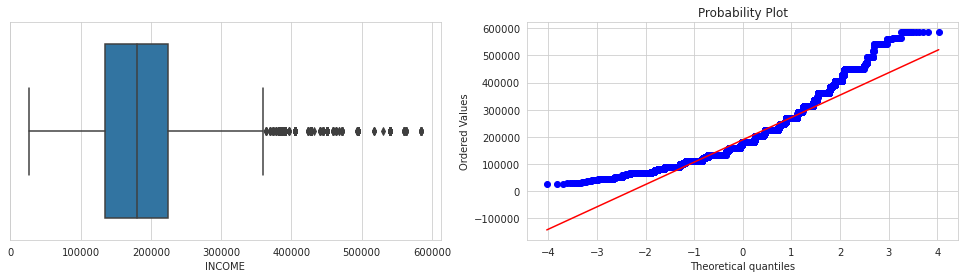

In [31]:
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(dataset.INCOME)

plt.subplot(122)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")

In [32]:
#Dropping the values greater the 20
dataset=dataset[dataset['YEARS_EMPLOYED'] < 20]

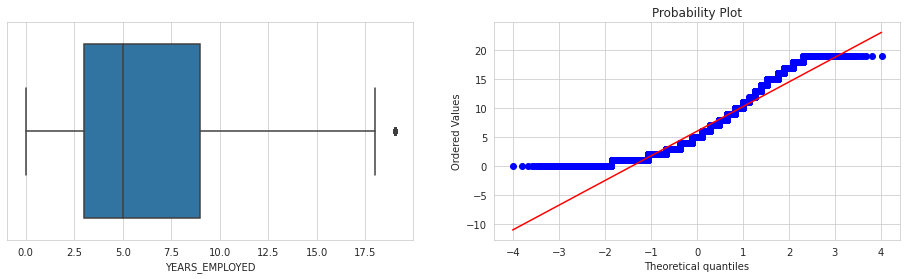

In [33]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.boxplot(dataset.YEARS_EMPLOYED)
plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")

- Boxplot shows that now few values are present. We cannot drop all the values that does not show normal distribution, dropping values can cause loss of data which is not required.
- After removing the outlier values the Q-Q plot shows now more values are alinged. In both the plots

In [34]:
dataset.drop(columns={"ID"},inplace=True,axis=1)

In [35]:
#everyone has phone 
dataset.drop("FLAG_MOBIL",inplace=True,axis=1)

In [36]:
#converting float data types to INT64 datatype
floats=["INCOME","FAMILY SIZE","BEGIN_MONTH"]

for i in floats:
    dataset[i]=dataset[i].astype("int64")

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
labels=["GENDER","CAR","REALITY","INCOME_TYPE","EDUCATION_TYPE","HOUSE_TYPE","FAMILY_TYPE"]
label=LabelEncoder()

for i in labels:
    dataset[i]=label.fit_transform(dataset[i])

- Label Encoder refers to conveting the labels to numeric

In [39]:
#dataset after using LabelEncoder
dataset.head()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,1,1,1,0,112500,4,4,1,1,0,0,0,2,29,59,3,0
1,0,0,1,0,270000,0,4,3,1,0,1,1,1,4,52,8,0
2,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
3,0,0,1,0,270000,0,4,3,1,0,1,1,1,26,52,8,0
4,0,0,1,0,270000,0,4,3,1,0,1,1,1,38,52,8,0


In [40]:
#corr of the 
dataset.corr()

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
GENDER,1.000000,0.335480,-0.038093,0.007133,0.215555,0.054693,0.049496,-0.048857,0.050642,0.016151,-0.022394,-0.029970,0.033294,-0.004875,-0.088454,-0.074834,0.018699
CAR,0.335480,1.000000,0.010930,0.060831,0.213636,0.001591,-0.072167,-0.098587,0.005645,-0.024479,-0.025668,0.001649,0.104713,0.026117,-0.052365,-0.002096,-0.003231
REALITY,-0.038093,0.010930,1.000000,0.021140,0.030626,-0.029387,0.008892,0.001889,-0.176601,-0.207793,-0.060026,0.062439,0.021296,-0.011152,0.089129,-0.008422,-0.022924
NO_OF_CHILD,0.007133,0.060831,0.021140,1.000000,-0.034394,0.041044,-0.024205,-0.161934,0.004803,-0.000719,-0.013026,-0.016472,0.905458,0.006449,-0.238263,0.015776,-0.003085
INCOME,0.215555,0.213636,0.030626,-0.034394,1.000000,-0.151565,-0.201597,0.036170,-0.007361,-0.098489,0.006639,0.068385,-0.045235,0.031696,0.053488,0.044452,0.011164
INCOME_TYPE,0.054693,0.001591,-0.029387,0.041044,-0.151565,1.000000,0.105883,-0.012714,-0.008985,0.079314,0.002694,-0.042644,0.043303,-0.005473,0.001142,0.024137,-0.001414
EDUCATION_TYPE,0.049496,-0.072167,0.008892,-0.024205,-0.201597,0.105883,1.000000,-0.001881,-0.029707,0.007729,-0.054091,-0.105592,-0.019444,-0.013024,0.144156,0.020961,-0.010094
FAMILY_TYPE,-0.048857,-0.098587,0.001889,-0.161934,0.036170,-0.012714,-0.001881,1.000000,0.040743,-0.048622,-0.026204,-0.013375,-0.520295,-0.042932,0.011540,-0.033102,0.022860
HOUSE_TYPE,0.050642,0.005645,-0.176601,0.004803,-0.007361,-0.008985,-0.029707,0.040743,1.000000,0.002463,-0.024382,-0.007611,-0.018643,-0.028966,-0.181886,-0.056428,0.001291
WORK_PHONE,0.016151,-0.024479,-0.207793,-0.000719,-0.098489,0.079314,0.007729,-0.048622,0.002463,1.000000,0.364953,-0.064787,0.016321,0.013210,-0.045377,0.012513,0.007058


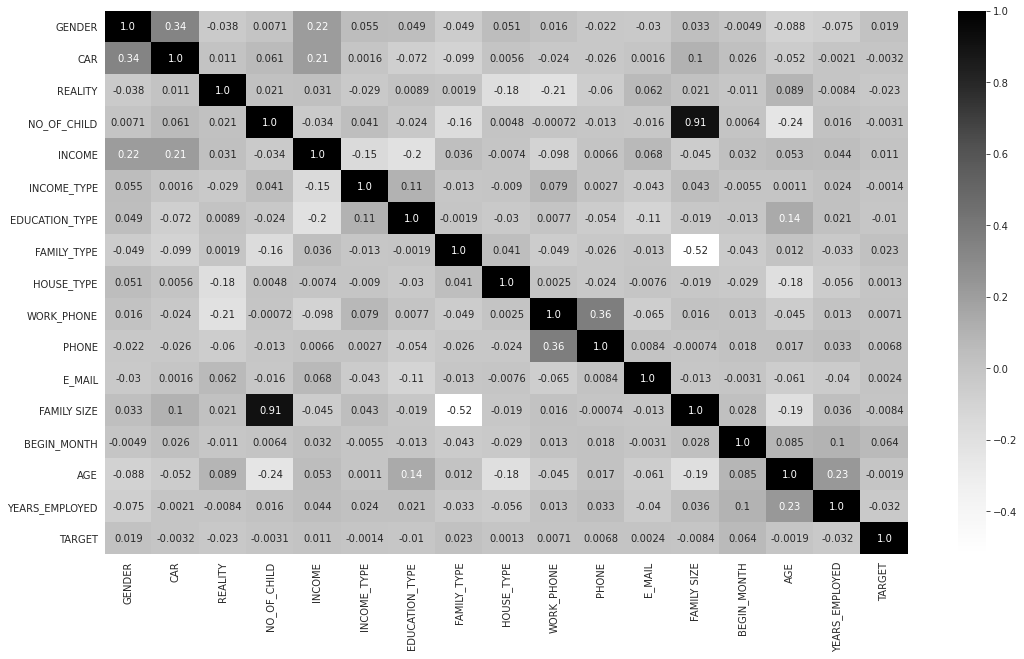

In [41]:
plt.figure(figsize=(18,10))
sns.heatmap(dataset.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

In [42]:
#FAMILY_SIZE and NO_OF_CHILD are highly correlated to each other so we can drop one feature form the dataset
dataset.drop('NO_OF_CHILD',inplace=True,axis=1)

# <a id='5'> Feature Selection - </a>

In [43]:
from sklearn.tree import ExtraTreeClassifier

In [44]:
X=dataset.drop("TARGET",axis=1)
y=dataset.TARGET

In [45]:
print("X :",X.shape)
print("y :",y.shape)

X : (23361, 15)
y : (23361,)


In [46]:
model=ExtraTreeClassifier()
model.fit(X,y)

ExtraTreeClassifier()

In [47]:
print(model.feature_importances_)

[0.03837357 0.01972198 0.01984612 0.13955656 0.02962962 0.03041889
 0.05361484 0.03379789 0.02089683 0.02326968 0.00964103 0.06134786
 0.30521598 0.12257852 0.09209063]


In [48]:
feat=pd.Series(model.feature_importances_,index=X.columns)

In [49]:
feats=feat.to_frame().reset_index()
feats.columns=["Features","Scores"]
features=feats.sort_values(by="Scores",ascending=False)
top_features=features.nlargest(12,"Scores")
top_features

,Features,Scores
12,BEGIN_MONTH,0.305216
3,INCOME,0.139557
13,AGE,0.122579
14,YEARS_EMPLOYED,0.092091
11,FAMILY SIZE,0.061348
6,FAMILY_TYPE,0.053615
0,GENDER,0.038374
7,HOUSE_TYPE,0.033798
5,EDUCATION_TYPE,0.030419
4,INCOME_TYPE,0.029630


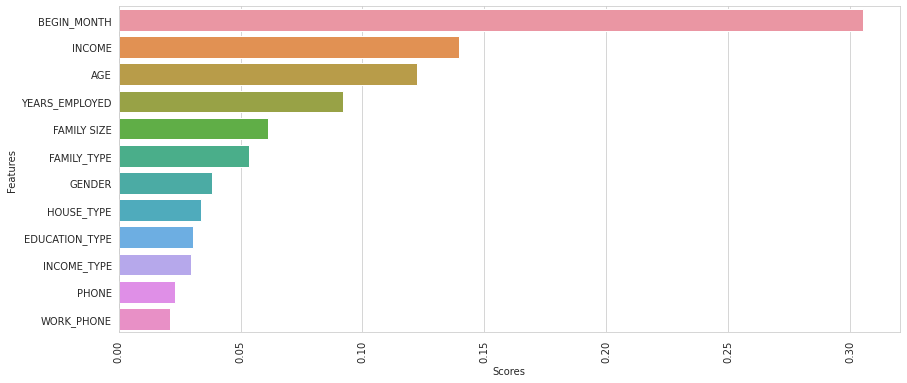

In [50]:
plt.figure(figsize=(14,6))
sns.barplot(y="Features",x="Scores",data=top_features)
plt.xticks(rotation=90)
plt.show()

In [51]:
new_data=dataset[["GENDER","BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE"
                  ,"PHONE","HOUSE_TYPE","EDUCATION_TYPE","TARGET"]]

In [52]:
new_data.shape

(23361, 13)

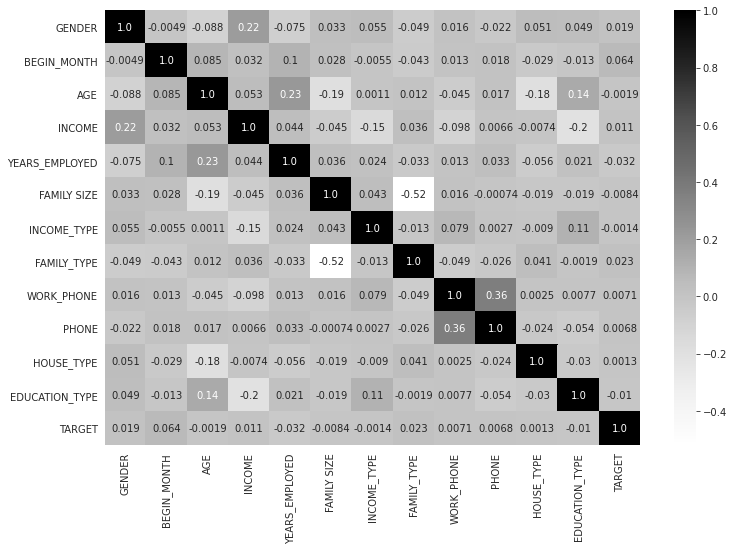

In [53]:
plt.figure(figsize=(12,8))
sns.heatmap(new_data.corr(),fmt='.2',annot=True,cmap="Greys")
plt.show()

### Dummy Variables -

In [54]:
new_data.head()

,GENDER,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,FAMILY SIZE,INCOME_TYPE,FAMILY_TYPE,WORK_PHONE,PHONE,HOUSE_TYPE,EDUCATION_TYPE,TARGET
0,1,29,59,112500,3,2,4,1,0,0,1,4,0
1,0,4,52,270000,8,1,0,3,0,1,1,4,0
2,0,26,52,270000,8,1,0,3,0,1,1,4,0
3,0,26,52,270000,8,1,0,3,0,1,1,4,0
4,0,38,52,270000,8,1,0,3,0,1,1,4,0


In [55]:
dummy_data=pd.get_dummies(new_data,columns={"GENDER","FAMILY SIZE","INCOME_TYPE","FAMILY_TYPE","WORK_PHONE","PHONE",
                                            "HOUSE_TYPE","EDUCATION_TYPE"},drop_first=True)

- Creating a seprate column for the subclasses of the above mentioned columns 

In [56]:
#shape of the dataset after creating dummy variables
dummy_data.shape

(23361, 34)

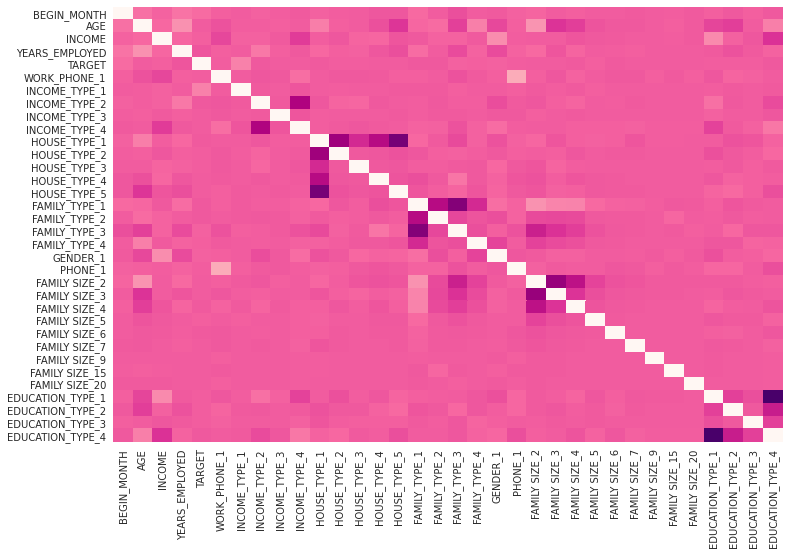

In [57]:
#checking the correlation of the new dataset
plt.figure(figsize=(12,8))
sns.heatmap(dummy_data.corr(),fmt='.2',cbar=False,cmap="RdPu_r")
plt.show()

# <a id='6'>Sampling Methods -</a>

### Our Goals :
   - To perform under and over sampling on the same dataset to impove the prediction of model.
   - For Oversampling SMOTE algorithm is used 
       - Creating a 50/50 sub-dataframe ratio of "Fraud" and "Non-Fraud" transactions. (SMOTE Algorithm)
   - For Undersampling Random resampling is used
       - Creating a 2:1 ratio for the majority class (Non-Fraud) 

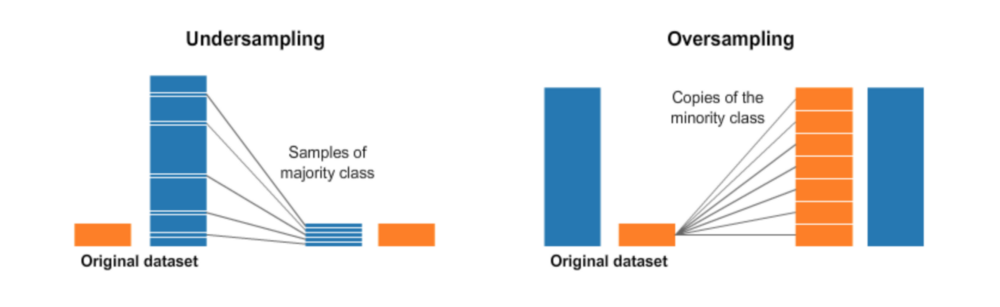 

- #### From dataset separating data in two parts which are data_minority(Fraudlent) and data_majority(Non-Fraudlent) 

In [58]:
data=dummy_data.copy()

In [59]:
data_minority=data[dataset["TARGET"] == 1]
data_majority=data[dataset["TARGET"] == 0]

In [60]:
print("Data_majority :",data_majority.shape)
print("Data_minority :",data_minority.shape)

Data_majority : (22957, 34)
Data_minority : (404, 34)


## <a id='61'> Over Sampling -</a>

- ###### **`Oversampling`**:- it means using replicating the data of minority class (fraud class) so that we can have a balanced data

**`SMOTE`** `:` -  it is also a type of oversampling but in this we will make the synthetic example of Minority data and will give as a balanced data

- SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

##### SMOTE (Synthetic minority oversampling technique)

   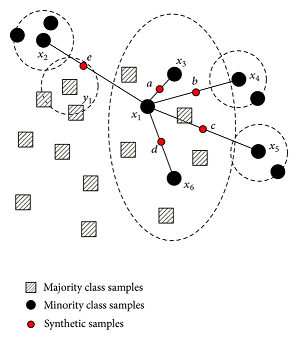 
   
                                                  Source - MEDIUM

- For detail Study
https://imbalanced-learn.org/stable/generated/imblearn.over_sampling.SMOTE.html

In [61]:
#library for perfroming SMOTE
from imblearn.over_sampling import SMOTE

In [62]:
data_oversampled=data.copy()

In [63]:
data_oversampled.TARGET.value_counts()

0    22957
1      404
Name: TARGET, dtype: int64

In [64]:
#setting TARGET variable SMOTE
X=data_oversampled.drop("TARGET",axis=1)
y=data_oversampled.TARGET

In [65]:
X_smote,y_smote=SMOTE().fit_sample(X,y)

In [66]:
#shape of dataset after using SMOTE
print("X",X_smote.shape)
print("y",y_smote.shape)

X (45914, 33)
y (45914,)


In [67]:
#head of data after using SMOTE
#X_smote.head()

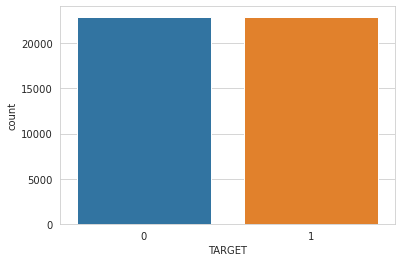

In [68]:
sns.countplot(y_smote)
plt.show()

- Now the target class have 50:50 instances of both Fraud and Non-Fraud

In [69]:
#considering the continuous variables -
X_smote_continuous=X_smote[["BEGIN_MONTH","AGE","INCOME","YEARS_EMPLOYED"]]

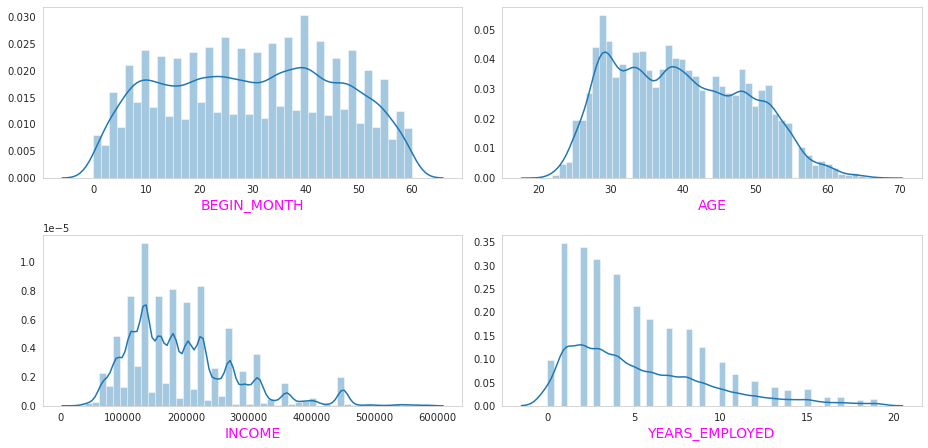

In [70]:
#distribution of the continuous variables after sampling the data using SMOTE -
plt.figure(figsize=(13,9))

for i,col in enumerate((X_smote_continuous.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(X_smote_continuous[col])
    plt.xlabel(col,fontsize=14,color="Magenta")
    plt.grid()
    plt.tight_layout()

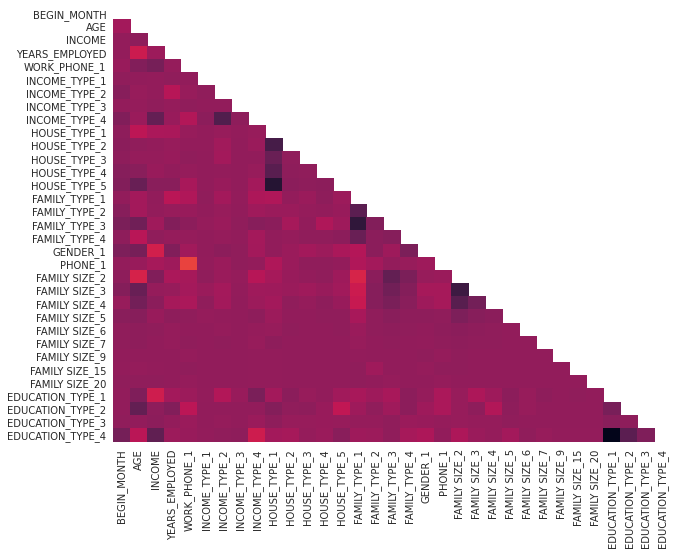

In [71]:
plt.figure(figsize=(10,8))
matrix = np.triu(X_smote.corr())
sns.heatmap(X_smote.corr(),mask=matrix,cbar=False)
plt.show()

##### `Creating model of the under_sampled data : to check the prediction of the model -`

In [72]:
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_smote,y_smote,test_size=0.25,random_state=99)

In [73]:
#size of data after spliting
print("X_train_over : ",X_train_over.shape,"\ny_train_over : ",y_train_over.shape)
print("X_train_over : ",X_test_over.shape,"\ny_train_over : ",y_test_over.shape)

X_train_over :  (34435, 33) 
y_train_over :  (34435,)
X_train_over :  (11479, 33) 
y_train_over :  (11479,)


###### Random Forest

In [74]:
random_over=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
random_over.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=50, n_estimators=700)

In [76]:
pred_over=random_over.predict(X_test_over)

In [77]:
print(metrics.classification_report(pred_over,y_test_over))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      5865
           1       0.96      0.99      0.98      5614

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



In [78]:
print(metrics.precision_score(pred_over,y_test_over))

0.9629373051610669


In [79]:
score_over = {}
score_over["Random_Forest"] ={}
score_over["Random_Forest"]["Precision"]=metrics.precision_score(pred_over,y_test_over)*100
score_over["Random_Forest"]["Recall"]=metrics.recall_score(pred_over,y_test_over)*100
score_over["Random_Forest"]["Accuracy"]=metrics.accuracy_score(pred_over,y_test_over)*100

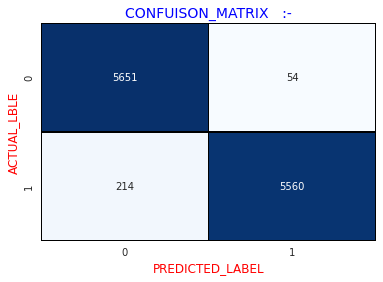

In [80]:
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_over),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

###### Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree=DecisionTreeClassifier()
tree.fit(X_train_over,y_train_over)

DecisionTreeClassifier()

In [83]:
pred_tree=tree.predict(X_test_over)

In [84]:
print(metrics.classification_report(y_test_over,pred_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5705
           1       0.98      0.99      0.98      5774

    accuracy                           0.98     11479
   macro avg       0.98      0.98      0.98     11479
weighted avg       0.98      0.98      0.98     11479



In [85]:
score_over["Decision_Tree"] ={}
score_over["Decision_Tree"]["Precision"]=metrics.precision_score(pred_tree,y_test_over)*100
score_over["Decision_Tree"]["Recall"]=metrics.recall_score(pred_tree,y_test_over)*100
score_over["Decision_Tree"]["Accuracy"]=metrics.accuracy_score(pred_tree,y_test_over)*100

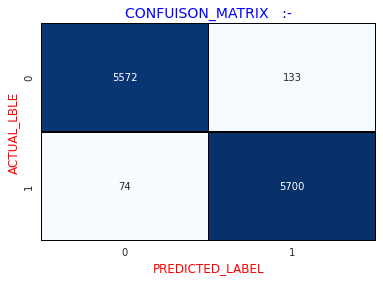

In [86]:
sns.heatmap(metrics.confusion_matrix(y_test_over,pred_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [87]:
score_oversampling=pd.DataFrame(score_over)

## <a id='62'> Under Sampling -</a>

- ###### **`Undersampling`**:- it means taking the less number of majority class (In our case taking less number of `Data_majority` so that our new data will be balanced

- In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.


- Note: The main problem with "Random Under-Sampling" is that  our classification models will not perform as accurate as we would like to since there is a great loss of informatyion (from 25k "Non-Fraud" to 844 "Non-Fraud")

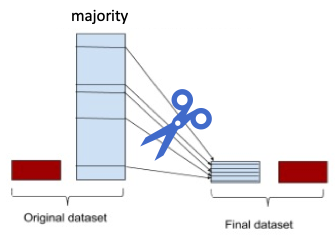
                                                                                                    
                                                                                                  -Source:TowardsDataScience

**`RANDOM RESAMPLING`** `:` -

In [88]:
#library for selecting data at random
from sklearn.utils import resample

In [89]:
data_undersampled=data.copy()

In [90]:
#target class count bofer under_sampling
data_undersampled.TARGET.value_counts()

0    22957
1      404
Name: TARGET, dtype: int64

In [91]:
#splitting the whole data set into to parts for under_sampling method-
data_majority_undersampled=data_undersampled[data_undersampled["TARGET"] == 0]
data_minority_undersampled=data_undersampled[data_undersampled["TARGET"] == 1]

In [92]:
#here we will be keeing the majority class double the size of minority class to prevent the model from underfitting
data_under_sampled=resample(data_majority_undersampled,n_samples=844,replace=True,random_state=42)

In [93]:
#shape of the majority class after resampling :
print(data_under_sampled.shape)

(844, 34)


In [94]:
data_under=pd.concat([data_under_sampled,data_minority])

In [95]:
#data afrer under sample
data_under.head()

,BEGIN_MONTH,AGE,INCOME,YEARS_EMPLOYED,TARGET,WORK_PHONE_1,INCOME_TYPE_1,INCOME_TYPE_2,INCOME_TYPE_3,INCOME_TYPE_4,...,FAMILY SIZE_5,FAMILY SIZE_6,FAMILY SIZE_7,FAMILY SIZE_9,FAMILY SIZE_15,FAMILY SIZE_20,EDUCATION_TYPE_1,EDUCATION_TYPE_2,EDUCATION_TYPE_3,EDUCATION_TYPE_4
17148,47,48,90000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
946,34,51,450000,7,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5859,10,41,225000,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
23404,52,48,225000,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13051,4,53,90000,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
#size of new data_ after under_sampling
data_under.shape

(1248, 34)

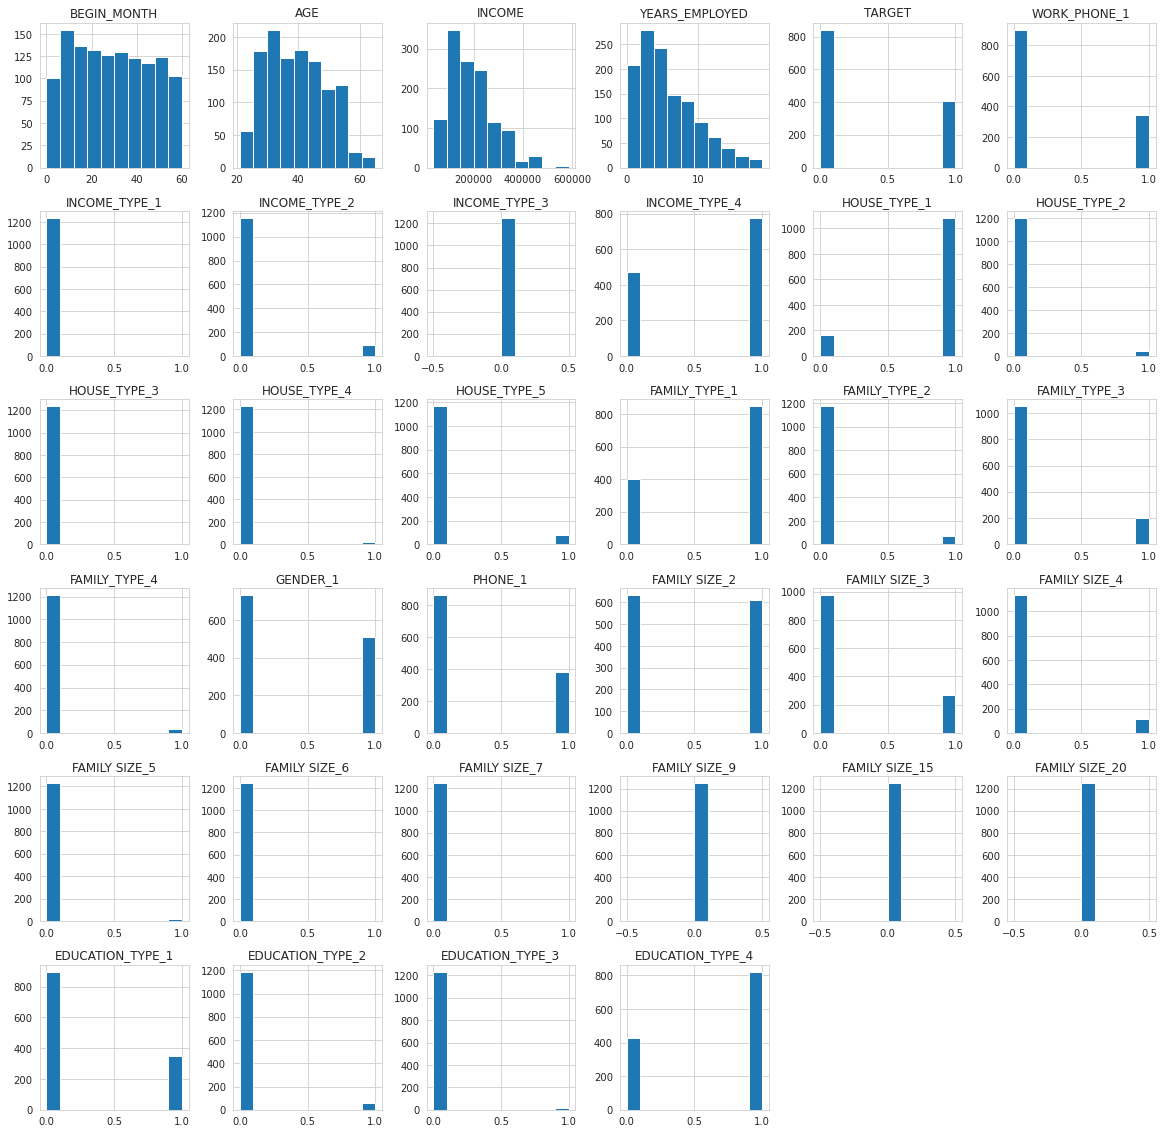

In [97]:
#data distribution after under sampling
data_under.hist(figsize=(20,20))
plt.show()

######  -   Distribution of data after under sampling looks normally distributed (ignoring the categorical columns)

In [98]:
#target column of sampled data
print(data_under.TARGET.value_counts())

0    844
1    404
Name: TARGET, dtype: int64


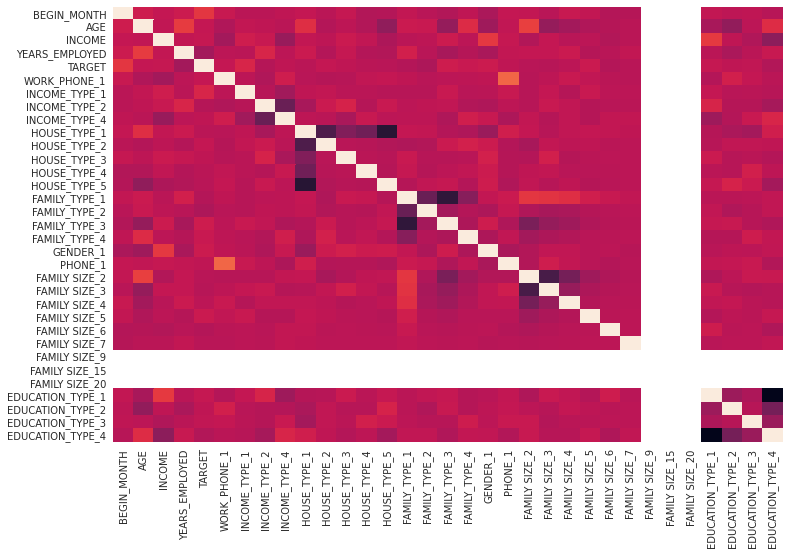

In [99]:
#Corr plot of the under_sampled data look same the normal data Major difference is not seen here in the plot.
#Removing from the correlation plot INCOME_TYPE_3 because it has all the values 1
plt.figure(figsize=(12,8))
sns.heatmap(data_under.drop("INCOME_TYPE_3",axis=1).corr(),fmt='.2',cbar=False)
plt.show()

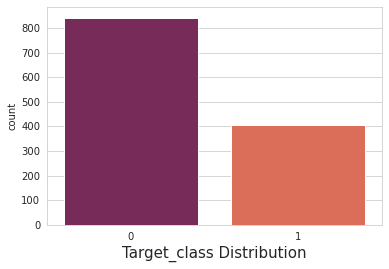

In [100]:
#after under_sampling the data now target class have 1:2 distribution
sns.countplot(data_under.TARGET,palette="rocket")
plt.xlabel("Target_class Distribution",fontsize=15)
plt.show()

##### `Creating model of the under_sampled data : to check the prediction of the model -`

In [101]:
X_under=data_under.drop("TARGET",axis=1)
y_under=data_under.TARGET

In [102]:
#spliting the data for train and test:
X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_under,y_under,test_size=0.25,random_state=71)

In [103]:
#size of data after spliting
print("X_train_under : ",X_train_under.shape,"\ny_train_under : ",y_train_under.shape)
print("X_train_under : ",X_test_under.shape,"\ny_train_under : ",y_test_under.shape)

X_train_under :  (936, 33) 
y_train_under :  (936,)
X_train_under :  (312, 33) 
y_train_under :  (312,)


###### Random Forest

In [104]:
random_under=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=50,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
random_under.fit(X_train_under,y_train_under)

RandomForestClassifier(max_depth=25, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=50, n_estimators=700)

In [106]:
pred_under=random_under.predict(X_test_under)
print(metrics.classification_report(pred_under,y_test_under))

              precision    recall  f1-score   support

           0       0.99      0.67      0.79       302
           1       0.06      0.70      0.12        10

    accuracy                           0.67       312
   macro avg       0.53      0.68      0.46       312
weighted avg       0.96      0.67      0.77       312



In [107]:
precision_under=(metrics.precision_score(pred_under,y_test_under))
precision_under

0.06481481481481481

In [108]:
score_under = {}
score_under["Random_Forest"] ={}
score_under["Random_Forest"]["Precision"]=metrics.precision_score(pred_under,y_test_under)*100
score_under["Random_Forest"]["Recall"]=metrics.recall_score(pred_under,y_test_under)*100
score_under["Random_Forest"]["Accuracy"]=metrics.accuracy_score(pred_under,y_test_under)*100

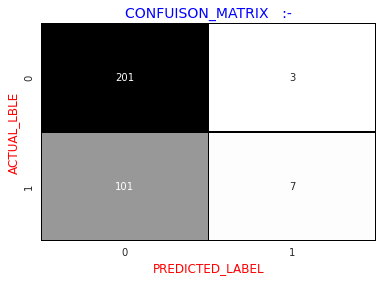

In [109]:
sns.heatmap(metrics.confusion_matrix(y_test_under,pred_under),annot=True,cbar=False
            ,cmap="Greys",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

###### Decision Tree

In [110]:
tree_under=DecisionTreeClassifier()
tree_under.fit(X_train_under,y_train_under)

DecisionTreeClassifier()

In [111]:
pred_under_tree=tree_under.predict(X_test_under)

In [112]:
print(metrics.classification_report(pred_under_tree,y_test_under))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74       226
           1       0.38      0.48      0.42        86

    accuracy                           0.64       312
   macro avg       0.58      0.59      0.58       312
weighted avg       0.67      0.64      0.65       312



In [113]:
score_under["Decision_Tree"] ={}
score_under["Decision_Tree"]["Precision"]=metrics.precision_score(pred_under_tree,y_test_under)*100
score_under["Decision_Tree"]["Recall"]=metrics.recall_score(pred_under_tree,y_test_under)*100
score_under["Decision_Tree"]["Accuracy"]=metrics.accuracy_score(pred_under_tree,y_test_under)*100

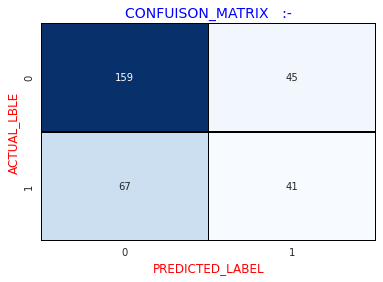

In [114]:
sns.heatmap(metrics.confusion_matrix(y_test_under,pred_under_tree),annot=True,cbar=False
            ,cmap="Blues",fmt="1",linecolor="Black",linewidth=0.3)
plt.xlabel("PREDICTED_LABEL",fontsize=12,color='r')
plt.ylabel("ACTUAL_LBLE",fontsize=12,color='r')
plt.title("CONFUISON_MATRIX   :-",fontsize=14,color="b")
plt.show()

In [115]:
score_undersampling=pd.DataFrame(score_under)

##### Comparing Scores -

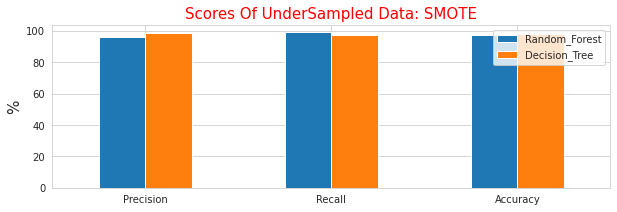

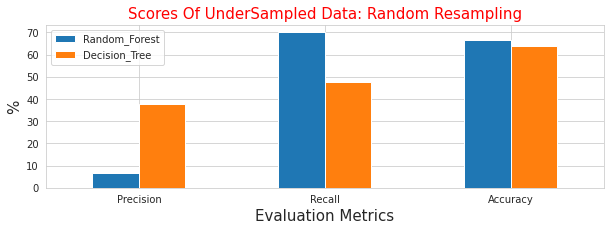

In [116]:
score_oversampling.plot(kind="bar",figsize=(10,3))
plt.xticks(rotation=(0))
#plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Scores Of UnderSampled Data: SMOTE",fontsize=15,color="Red")

score_undersampling.plot(kind="bar",figsize=(10,3))
plt.xticks(rotation=(0))
plt.xlabel("Evaluation Metrics",fontsize=15)
plt.ylabel("%",fontsize=15)
plt.title("Scores Of UnderSampled Data: Random Resampling",fontsize=15,color="Red")
plt.show()

##### Roc-Auc curve 

- Using the Values of Random Forest Classifiers build using the SMOTE technique as this model shows good scores compared to others


Xtest : 0.9965946503213201 


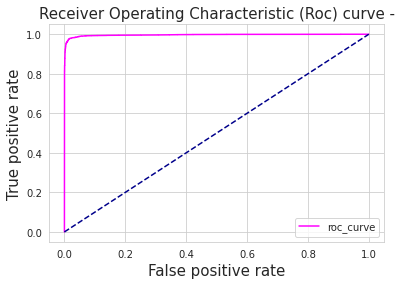

In [117]:
from sklearn.metrics import roc_auc_score,roc_curve

ytest_pred=random_over.predict_proba(X_test_over)
print("Xtest : {} ".format(roc_auc_score(y_test_over,ytest_pred[:,-1])))
ytest_pred_ = ytest_pred[:,-1]

fpr,tpr,thresholds = roc_curve(y_test_over,ytest_pred_)

#plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='roc_curve',color='MAGENTA')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive rate",fontsize=15)
plt.xlabel("False positive rate",fontsize=15)
plt.title("Receiver Operating Characteristic (Roc) curve -",fontsize=15)
plt.legend()
plt.show()

###### CONCLUSION:-

 Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions)
 
 As SMOTE show promising result as compared to Random Resampling. In Ramdom Undersampling where the data is reduced to size of the minority class, most of the Important Data is lost. 
 
 Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases.

- On imbalanced dataset Combination of SMOTE and resampling also work well you can try !!

-For Detailed Study of the dataset.
 - https://www.kaggle.com/rikdifos/credit-card-approval-prediction